# Yasir Hassan
# Hierarchical Clustering with different linkage - Parkinson_Prediction 

In [11]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [12]:
dataset = pd.read_csv(r"C:\Users\BDParkinson_Prediction .csv")

In [17]:
#dataset.head

In [19]:
df = pd.DataFrame(dataset)

In [20]:
# check the shape of the dataframe
df.shape

(500, 7)

In [21]:
# this method to convert column CLASS from string to int.
def trans_class(x):
    if x == 'Class_1':
        return 1
    if x == 'Class_2':
        return 2
    if x == 'Class_3':
        return 3
    if x == 'Class_4':
        return 4

In [22]:
# call trans_class method
df['Trans_class'] = df['CLASS'].apply(trans_class)

In [23]:
# eliminate column CLASS/Trans_class
dataset.drop('CLASS', axis = 1, inplace = True)
dataset.drop('Trans_class', axis = 1, inplace = True)

In [25]:
#dataset

In [27]:
# build the model for AgglomerativeClustering
# and get the cluster memberships
# on the training set ... use the fit_predict method.
# linkage criteria specifies how  the “most similar cluster” is measured
agg = AgglomerativeClustering(n_clusters= 4, affinity = 'euclidean', linkage = 'ward')
hc = agg.fit_predict(dataset)

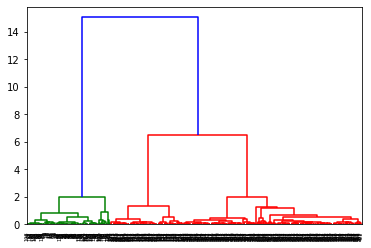

In [28]:
# linkage criteria specifies how  the “most similar cluster” is measured.
# 'ward' is the default choice, ward picks the two clusters to merge such that 
# the variance within all clusters increases the least. This often leads to
# clusters that are relatively equally sized.
dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'ward'))

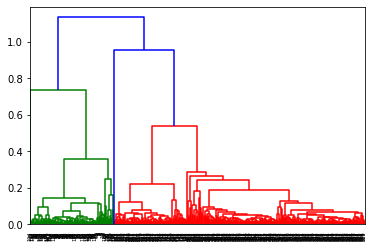

In [29]:
# average-linkage merges the two clusters that have the smallest average 
# distance between all their points.
dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'average'))

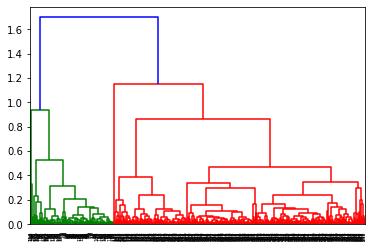

In [30]:
# complete-linkage (or, maximum linkage) merges the two clusters that
# have the smallest maximum distance between their points.
dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'complete'))

In [31]:
# Import the dendrogram function and the ward clustering function from SciPy.
from scipy.cluster.hierarchy import dendrogram, ward

In [32]:
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(dataset)

Text(0, 0.5, 'Cluster distance')

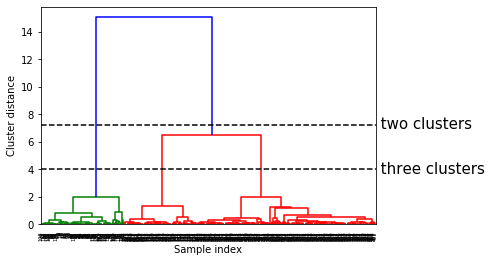

In [35]:
# Evaluating the clusters:
# Plot the dendrogram for the linkage_array containing the distances
# between clusters.
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [37]:
# Discussion of the obtained clusters:
# The dendrogram shows data points as points on the bottom (numbered from 0 to 11). 
# Then, a tree is plotted with these points (representing single-point clusters) as the
# leaves, and a new node parent is added for each two clusters that are joined.

# The y-axis in the dendrogram doesn’t just specify when in the agglomerative algorithm
# two clusters get merged. The length of each branch also shows how far apart
# the merged clusters are. The longest branches in this dendrogram are the three lines
# that are marked by the dashed line labeled “three clusters.” That these are the longest
# branches indicates that going from three to two clusters meant merging some very
# far-apart points. This happens at the top of the chart, where merging the two
# remaining clusters into a single cluster again bridges a relatively large distance.